# Baseline Model Workflow

## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [3]:
train_values = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/train_values.csv')
train_labels = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/train_labels.csv')
test_values = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/test_values.csv')

In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


### Define X and y (Train)

In [6]:
X = train_values.drop(columns=['building_id'])
y = train_labels['damage_grade']

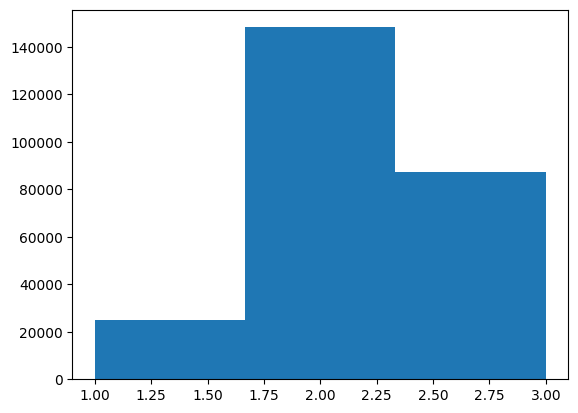

In [7]:
plt.hist(y, bins=3);

In [8]:
X_object = X.select_dtypes(include='object')
X_object.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [9]:
X_int = X.select_dtypes(include='int64')
X_int.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [10]:
X.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preproc Pipeline

In [11]:
num_transformer = make_pipeline(StandardScaler())
num_col = make_column_selector(dtype_include=['int64'])

cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cat_col = make_column_selector(dtype_include=['object'])

In [12]:
preproc_basic = make_column_transformer((num_transformer, num_col),
                                        (cat_transformer, cat_col), 
                                        remainder='passthrough')

In [13]:
X_preproc = preproc_basic.fit_transform(X)

In [14]:
X.shape

(260601, 38)

In [15]:
X_preproc.shape

(260601, 68)

### Reduce Size of Train Dataset

In [46]:
X_train = X[:260601]
y_train = y[:260601]

In [53]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


## Basic Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# model = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
# model = OneVsRestClassifier(SVC())

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2)

pipe_baseline = make_pipeline(preproc_basic, model)

In [48]:
pipe_baseline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1312711e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1312712d0>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2))])

In [49]:
pipe_baseline.predict(X_train)

array([2, 2, 2, ..., 2, 2, 2])

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Cross validate model
model_score = cross_val_score(pipe_baseline, X_train, y_train, cv=10, scoring='f1_micro')
model_score = model_score.mean()
model_score

0.5703968960243608

## Make Submission

### Prediction

In [30]:
X_test = test_values.drop(columns=['building_id'])

In [31]:
y_test_pred = pipe_baseline.predict(X_test)

In [33]:
y_test_pred.shape

(86868,)

### CSV Export

In [38]:
building_id = test_values['building_id']

In [39]:
y_pred_submission = pd.DataFrame(y_test_pred, columns=['damage_grade'])
y_pred_submission

submission = pd.concat([building_id, y_pred_submission], axis=1)
submission

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,2
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [45]:
submission.to_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/submissions/submission_baseline.csv', index=False)  